# 1. Importing libraries

In [41]:
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
plt.style.use('fivethirtyeight')

# 2. Data exploration

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
df = spark.read.csv('Mall_Customers.csv', inferSchema=True, header=True)
df.show(5)

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
+----------+------+---+------------------+----------------------+
only showing top 5 rows



In [5]:
df.count()

200

In [6]:
df.columns

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [7]:
df.describe().show()

+-------+------------------+------+-----------------+------------------+----------------------+
|summary|        CustomerID|Gender|              Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
|  count|               200|   200|              200|               200|                   200|
|   mean|             100.5|  null|            38.85|             60.56|                  50.2|
| stddev|57.879184513951124|  null|13.96900733155888| 26.26472116527124|    25.823521668370173|
|    min|                 1|Female|               18|                15|                     1|
|    max|               200|  Male|               70|               137|                    99|
+-------+------------------+------+-----------------+------------------+----------------------+



In [8]:
df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



# 3. Data visualization

In [9]:
pandas_df = df.toPandas()

## 3.1. Histograms of age, annual income and spending score 

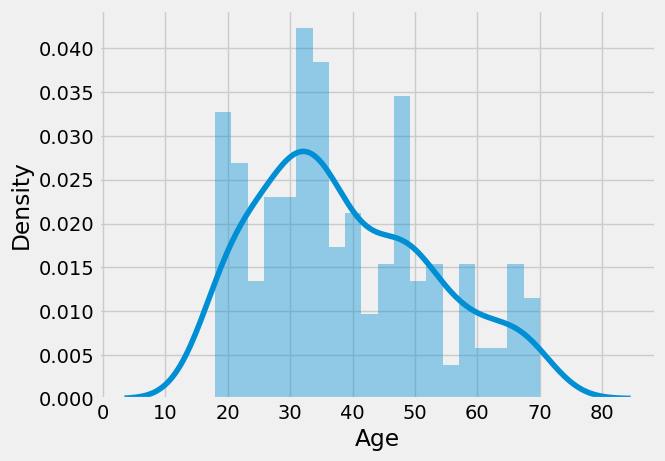

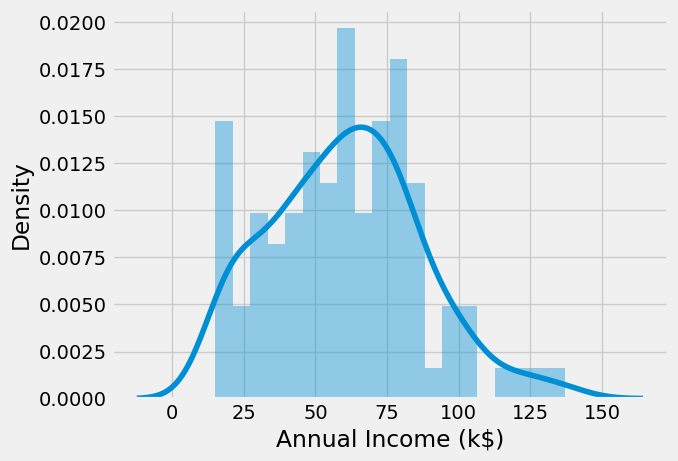

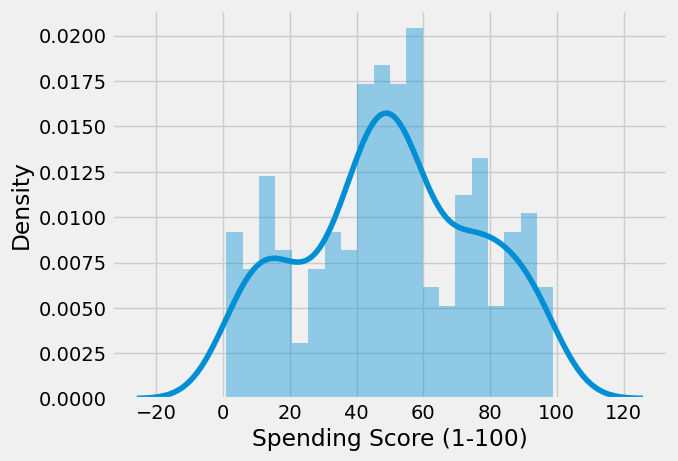

In [10]:
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(pandas_df[x], bins=20)
    plt.show()

## 3.2. Count plot of gender

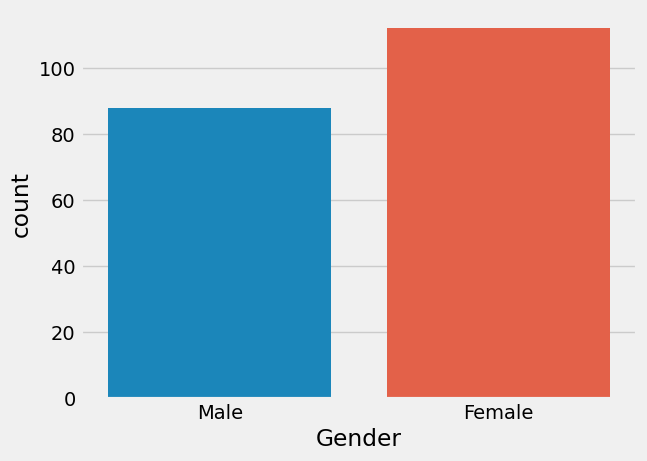

In [11]:
sns.countplot(x='Gender', data=pandas_df)
plt.show()

## 3.3. The relation between age, annual income and spending score with regard to gender

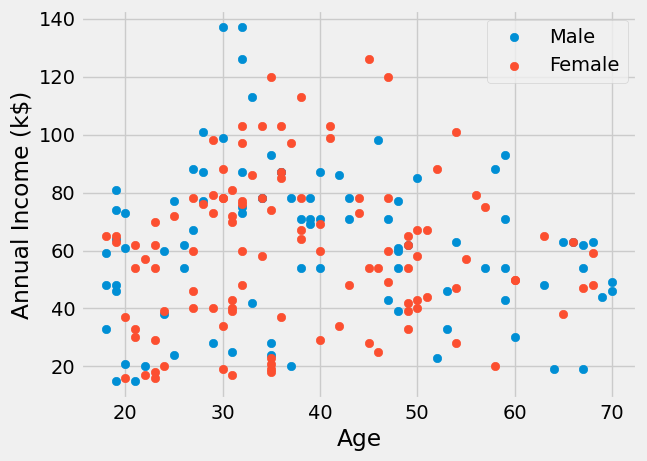

In [12]:
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=pandas_df[pandas_df['Gender']==gender], label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

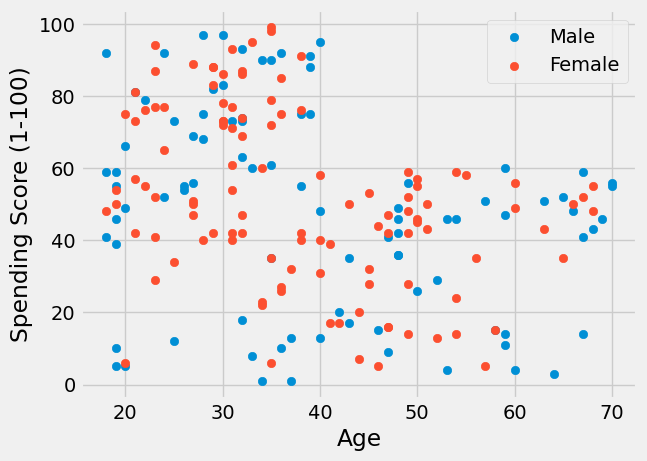

In [13]:
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Spending Score (1-100)', data=pandas_df[pandas_df['Gender']==gender], label=gender)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

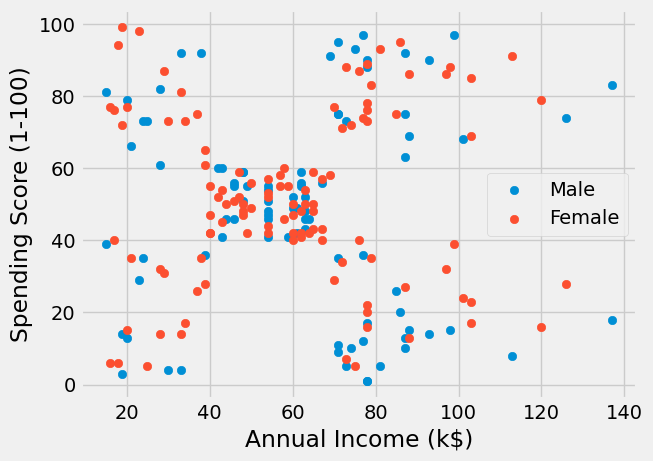

In [14]:
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=pandas_df[pandas_df['Gender']==gender], label=gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 4. Clustering using K-means

## 4.1. Clustering using Age and Spending Score

In [15]:
feat_cols = ['Age', 'Spending Score (1-100)']

In [16]:
assembler = VectorAssembler(inputCols=feat_cols, outputCol='features')

In [17]:
final_df = assembler.transform(df)

In [18]:
silhouettes = []

for k in range(2,11):
    kmeans = KMeans().setK(k).setSeed(1234)
    model = kmeans.fit(final_df)
    
    predictions = model.transform(final_df)
    
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouettes.append(silhouette)

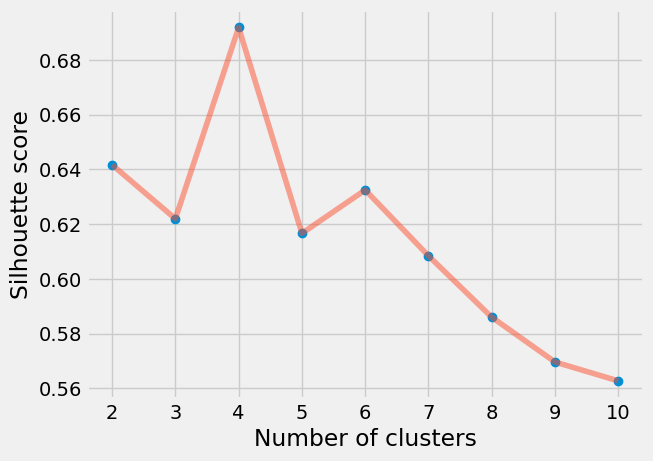

In [19]:
plt.plot(np.arange(2, 11), silhouettes, 'o')
plt.plot(np.arange(2, 11), silhouettes, '-', alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [20]:
kmeans = KMeans().setK(4).setSeed(1234)
model = kmeans.fit(final_df)

In [21]:
# Make predictions
predictions = model.transform(final_df)
predictions.show(5)

+----------+------+---+------------------+----------------------+-----------+----------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|   features|prediction|
+----------+------+---+------------------+----------------------+-----------+----------+
|         1|  Male| 19|                15|                    39|[19.0,39.0]|         0|
|         2|  Male| 21|                15|                    81|[21.0,81.0]|         3|
|         3|Female| 20|                16|                     6| [20.0,6.0]|         1|
|         4|Female| 23|                16|                    77|[23.0,77.0]|         3|
|         5|Female| 31|                17|                    40|[31.0,40.0]|         0|
+----------+------+---+------------------+----------------------+-----------+----------+
only showing top 5 rows



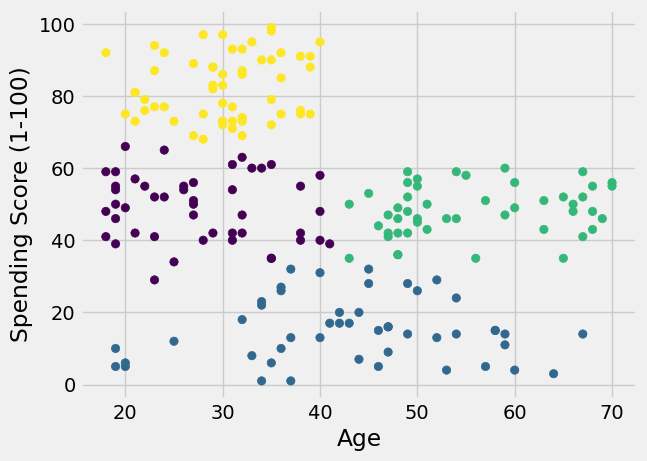

In [22]:
pandas_predictions = predictions.toPandas()
plt.scatter(x='Age', y='Spending Score (1-100)', data=pandas_predictions, c='prediction')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 4.2. Clustering using Annual Income and Spending Score

In [23]:
feat_cols = ['Annual Income (k$)', 'Spending Score (1-100)']

In [24]:
assembler = VectorAssembler(inputCols=feat_cols, outputCol='features')

In [25]:
final_df = assembler.transform(df)

In [26]:
silhouettes = []

for k in range(2,11):
    kmeans = KMeans().setK(k).setSeed(1234)
    model = kmeans.fit(final_df)
    
    predictions = model.transform(final_df)
    
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouettes.append(silhouette)

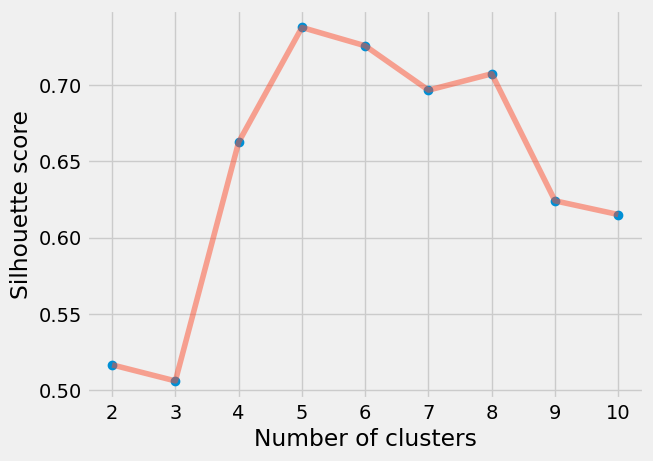

In [27]:
plt.plot(np.arange(2, 11), silhouettes, 'o')
plt.plot(np.arange(2, 11), silhouettes, '-', alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [28]:
kmeans = KMeans().setK(5).setSeed(1234)
model = kmeans.fit(final_df)

In [29]:
# Make predictions
predictions = model.transform(final_df)
predictions.show(5)

+----------+------+---+------------------+----------------------+-----------+----------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|   features|prediction|
+----------+------+---+------------------+----------------------+-----------+----------+
|         1|  Male| 19|                15|                    39|[15.0,39.0]|         4|
|         2|  Male| 21|                15|                    81|[15.0,81.0]|         2|
|         3|Female| 20|                16|                     6| [16.0,6.0]|         4|
|         4|Female| 23|                16|                    77|[16.0,77.0]|         2|
|         5|Female| 31|                17|                    40|[17.0,40.0]|         4|
+----------+------+---+------------------+----------------------+-----------+----------+
only showing top 5 rows



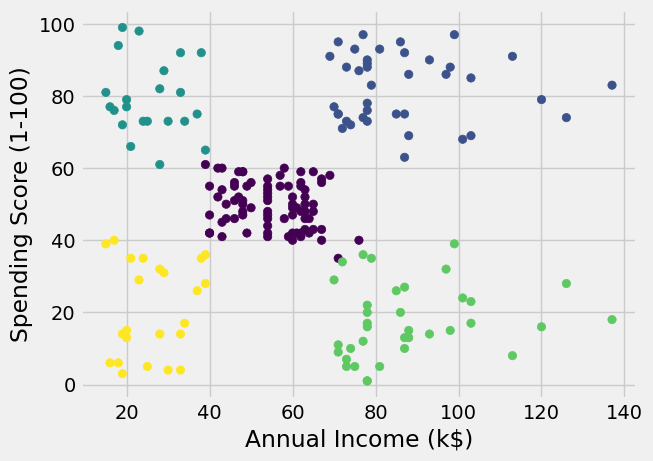

In [30]:
pandas_predictions = predictions.toPandas()
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=pandas_predictions, c='prediction')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 4.3. Clustering using Age , Annual Income and Spending Score

In [31]:
feat_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [32]:
assembler = VectorAssembler(inputCols=feat_cols, outputCol='features')

In [33]:
final_df = assembler.transform(df)

In [34]:
silhouettes = []

for k in range(2,11):
    kmeans = KMeans().setK(k).setSeed(1234)
    model = kmeans.fit(final_df)
    
    predictions = model.transform(final_df)
    
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouettes.append(silhouette)

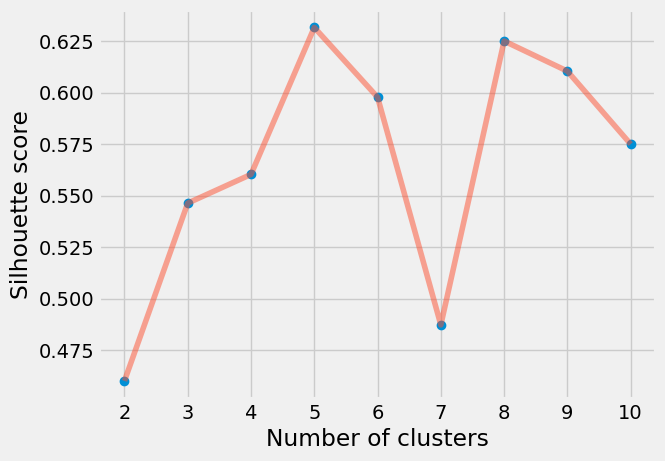

In [35]:
plt.plot(np.arange(2, 11), silhouettes, 'o')
plt.plot(np.arange(2, 11), silhouettes, '-', alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [36]:
kmeans = KMeans().setK(5).setSeed(1234)
model = kmeans.fit(final_df)

In [37]:
# Make predictions
predictions = model.transform(final_df)
predictions.show(5)

+----------+------+---+------------------+----------------------+----------------+----------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|        features|prediction|
+----------+------+---+------------------+----------------------+----------------+----------+
|         1|  Male| 19|                15|                    39|[19.0,15.0,39.0]|         2|
|         2|  Male| 21|                15|                    81|[21.0,15.0,81.0]|         4|
|         3|Female| 20|                16|                     6| [20.0,16.0,6.0]|         2|
|         4|Female| 23|                16|                    77|[23.0,16.0,77.0]|         4|
|         5|Female| 31|                17|                    40|[31.0,17.0,40.0]|         2|
+----------+------+---+------------------+----------------------+----------------+----------+
only showing top 5 rows



In [38]:
pandas_predictions = predictions.toPandas()

In [46]:
trace = go.Scatter3d(x= pandas_predictions['Age'],
                     y= pandas_predictions['Spending Score (1-100)'],
                     z= pandas_predictions['Annual Income (k$)'],
                     mode='markers',
                     marker=dict(color = pandas_predictions['prediction'],
                                 line=dict(color= pandas_predictions['prediction'],
                                           width= 12),
                                 opacity=0.8))
data = [trace]

layout = go.Layout(scene = dict(xaxis = dict(title  = 'Age'),
                                yaxis = dict(title  = 'Spending Score'),
                                zaxis = dict(title  = 'Annual Income')))

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)